In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import math
import matplotlib.pyplot as plt

In [2]:
#Differential Evolution Algorithm

def de_run(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    dimensions = len(bounds)
    #pop: intialize random populatation
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx]
        
#yield is used in order to support last step of iteration
#more details at https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do        

In [3]:
f_bias = [-450.0 , -450 , 390 , -330 , -180 , -140]

In [4]:
# initial guesses
n = 500
#x0 = np.zeros(n)
x0 = np.zeros(n)
dim =np.arange(0,500, 1).tolist()

In [5]:
################################
## 1.Shifted Sphere Function ###
################################

# 1.Shifted Sphere Function
def Shifted_Sphere(x):
    F = 0
    for i in range(len(x)):
        F += x[i]*x[i];
    return F + f_bias[0];

Final Objective: -450.0


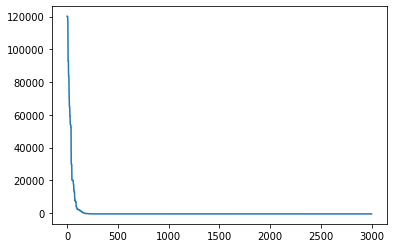

In [6]:
#run the optimization at D=50
dim = 50
result_D50 = list(de_run(Shifted_Sphere, bounds=[(0, 100)] * dim , its=3000))

x, f = zip(*result_D50)
plt.plot(f)

# show final objective
ya= result_D50[-1]
ya[1]
print('Final Objective: ' + str(ya[1]))

Final Objective: 77852.0849898852


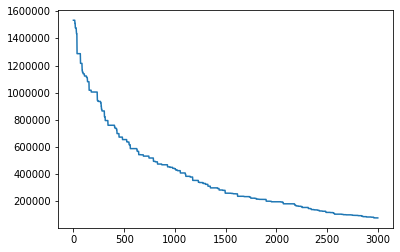

In [9]:
#run the optimization at D=500
result_D500 = list(de_run(Shifted_Sphere, bounds=[(0, 100)] * 500 , its=3000))

#fitness in function of time
x, f = zip(*result_D500)
plt.clf()
plt.plot(f)

# show final objective
ya= result_D500[-1]
ya[1]
print('Final Objective: ' + str(ya[1]))